## Solución atómica para el modelo de Anderson

> En este pequeño notebook, se dará solución al modelo de anderson en el límite en el cual la banda de conducción colapsa a un estado.

In [1]:
 #Autoestados
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as tk

In [2]:
Ef=1
Eq=1
V=0
U=-2
def delta(Ef,Eq,V):
    return np.sqrt((Ef-Eq)**2+4*V**2)
Delta=np.sqrt((Ef-Eq)**2+4*V**2)
def deltap(Ef,Eq,U,V):
    return np.sqrt((Ef+U-Eq)**2+4*V**2)
def R(Ef,Eq,U):
    return 1/54*(-3*((Ef+Eq)**2*(2*Ef+U)+(Ef+Eq)**2*2*Eq+(2*Ef+U)**2*(Ef+Eq)+(2*Ef+U)**2*2*Eq+(2*Eq)**2*(Eq+Ef)+(2*Eq)**2*(2*Ef+U))+12*(Eq+Ef)*(2*Ef+U)*2*Eq+18*V**2*(2*(Eq+Ef)-(2*Ef+U)-2*Eq)+2*((Ef+Eq)**3+(2*Ef+U)**3+(2*Eq)**3))
def Q(Ef,Eq,U,V):
    return -1/9*(12*V**2+(Ef+Eq)**2+(2*Ef+U)**2+(2*Eq)**2-(Eq+Ef)*(2*Ef+U)-(Eq+Ef)*2*Eq-(2*Ef+U)*2*Eq)
def theta1(Ef,Eq,U,V):
    return np.arccos(R(Ef,Eq,U)/np.sqrt(-Q(Ef,Eq,U,V)**3))

In [3]:
#Autoestados.
def Energia(Ef,Eq,U,V):
    Delta=delta(Ef,Eq,V)
    Deltap=deltap(Ef,Eq,U,V)
    r=R(Ef,Eq,U)
    q=Q(Ef,Eq,U,V)
    E=[0 for i in range(16)]
    E[0]=0
    E[1]=1/2*(Ef+Eq-Delta)
    E[2]=E[1]
    E[3]=1/2*(Ef+Eq+Delta)
    E[4]=E[3]
    E[5]=Ef+Eq
    E[6]=E[5]
    E[7]=E[6]
    E[8]=2*np.sqrt(-q)*np.cos(theta1(Ef,Eq,U,V)/3)
    E[9]=2*np.sqrt(-q)*np.cos((theta1(Ef,Eq,U,V)+2*np.pi)/3)
    E[10]=2*np.sqrt(-q)*np.cos((theta1(Ef,Eq,U,V)+4*np.pi)/3)
    E[11]=1/2*(3*Ef+3*Eq+U-Deltap)
    E[12]=E[11]
    E[13]=1/2*(3*Ef+3*Eq+U+Deltap)
    E[14]=E[13]
    E[15]=2*Ef+2*Eq+U
    return E
#Hallar mínimo
def sobrezero(Energy):
    min=Energy[0]
    for E in Energy:
        if(E<min):min=E
    for i in range(len(Energy)):
        Energy[i]-=min
    return Energy


In [4]:
A=Energia(1,2,3,4)


## Lectura de archivos

In [5]:
# Se lee el archivo aqui
def read_file(filename,filename2,n):
    archivo=open(filename)
    Data=[[] for i in range(n)]
    A=archivo.read().split("\n")
    for line in A:
        C=re.findall("-*"+"[0-9]+.[0-9]+",line)
        if len(C)==n:
            for j in range(n):
                Data[j].append(float(C[j]))
    try:
        archiva=open(filename2)
        A=archiva.read().split("\n")
        for line in A:
            C=re.findall("-*"+"[0-9]+.[0-9]+",line)
            if len(C)==n:
                for j in range(n):
                    Data[j].append(float(C[j]))
        return Data
    except:     
        return Data
                                 

In [42]:
Datos=[[],[],[]]
for i in range(6,7):
    Datos[i-4]=read_file("2QDsEfVar(15-9-21)T="+str(i)+"+.dat","2QDsEfVAR(15-9-21)T="+str(i)+"-.dat",19)
    print(Datos)

[[], [], [[-10.0, -10.11705686, -10.23411371, -10.35117057, -10.46822742, -10.58528428, -10.70234114, -10.81939799, -10.93645485, -11.05351171, -11.17056856, -11.28762542, -11.40468227, -11.52173913, -11.63879599, -11.75585284, -11.8729097, -11.98996656, -12.10702341, -12.22408027, -12.34113712, -12.45819398, -12.57525084, -12.69230769, -12.80936455, -12.9264214, -13.04347826, -13.16053512, -13.27759197, -13.39464883, -13.51170569, -13.62876254, -13.7458194, -13.86287625, -13.97993311, -14.09698997, -14.21404682, -14.33110368, -14.44816054, -14.56521739, -14.68227425, -14.7993311, -14.91638796, -15.03344482, -15.15050167, -15.26755853, -15.38461538, -15.50167224, -15.6187291, -15.73578595, -15.85284281, -15.96989967, -16.08695652, -16.20401338, -16.32107023, -16.43812709, -16.55518395, -16.6722408, -16.78929766, -16.90635452, -17.02341137, -17.14046823, -17.25752508, -17.37458194, -17.4916388, -17.60869565, -17.72575251, -17.84280936, -17.95986622, -18.07692308, -18.19397993, -18.31103

In [43]:
Datos[6]

IndexError: list index out of range

## Gráficas
\begin{matrix}
Parámetro & Número \\
E_{QD_1} & 0 \\
Ajuste E_{QD_1} & 1 \\
Ajuste E_{QD_2} & 2 \\
\%_{QD_2} & 3 \\
\%_{QD_1} & 4 \\
G^2 & 5 \\
S & 6 \\
A_k & 7 \\
Figura\; de\; mérito\;Z & 8 \\
WFR\;Wiedemann-Franz & 9 \\
N_{ocupación 1D} & 10 \\
N_{ocupación 2D} & 11 \\
Fase\; local\; G.F & 12\\
Fase\;QD_2 & 13 \\
Fase\;QD_1 & 14 \\
Fase\; Efectiva & 15\\
\;Mahan\;Soho\; S & 16\\
Temperatura\; T & 17\\
E_{QD_2} & 18 \\
\end{matrix}

In [44]:

labels=[r"$E_{QD_1}$",r"Ajuste $E_{QD_1}$",r"Ajuste $E_{QD_2}$",r"$\%_{QD_2}$","$\%_{QD_1}$",r"$G^2$","S",r"$A_k$","Figura de mérito Z","WFR Wiedemann-Franz",r"$N_{QD_1}$",r"$N_{QD_2}$",r"$\phi_{local}$",r"$\phi_{QD_2}$",r"$\phi_{QD_1}$",r"$\phi_{eff}$","Mahan Soho S","Temperatura",r"$E_{QD_2}$"]

            

i0
j15
[-10.0, -10.11705686, -10.23411371, -10.35117057, -10.46822742, -10.58528428, -10.70234114, -10.81939799, -10.93645485, -11.05351171, -11.17056856, -11.28762542, -11.40468227, -11.52173913, -11.63879599, -11.75585284, -11.8729097, -11.98996656, -12.10702341, -12.22408027, -12.34113712, -12.45819398, -12.57525084, -12.69230769, -12.80936455, -12.9264214, -13.04347826, -13.16053512, -13.27759197, -13.39464883, -13.51170569, -13.62876254, -13.7458194, -13.86287625, -13.97993311, -14.09698997, -14.21404682, -14.33110368, -14.44816054, -14.56521739, -14.68227425, -14.7993311, -14.91638796, -15.03344482, -15.15050167, -15.26755853, -15.38461538, -15.50167224, -15.6187291, -15.73578595, -15.85284281, -15.96989967, -16.08695652, -16.20401338, -16.32107023, -16.43812709, -16.55518395, -16.6722408, -16.78929766, -16.90635452, -17.02341137, -17.14046823, -17.25752508, -17.37458194, -17.4916388, -17.60869565, -17.72575251, -17.84280936, -17.95986622, -18.07692308, -18.19397993, -18.31103679

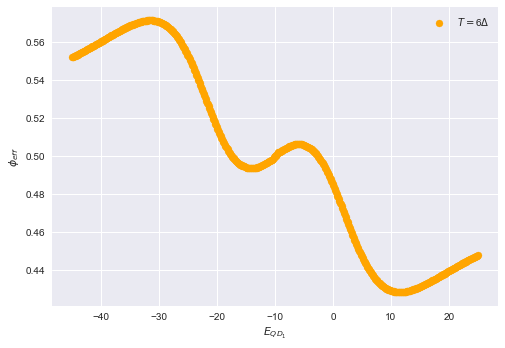

In [45]:
i=int(input("i"))
j=int(input("j"))
#Datos[i].sort()
#Datos[j].sort()
colors=["red","blue","orange"]
plt.figure()
plt.style.use("seaborn")
for m in range(6,7):
    x=Datos[m-4][i]
    y=Datos[m-4][j]
    print(x)
    print(y)
    #if(j==15):
    #    for a in range(len(y)):
    #        y[a]= np.cos(2*np.pi*y[a])
    #plt.plot(x,y,color='black',label=labels[i]+" vs "+labels[j])
    plt.scatter(x,y, color=colors[m-4],label=r"$T=$"+str(m)+"$\Delta$")
    plt.xlabel(labels[i])
    plt.ylabel(labels[j])
plt.legend()
plt.savefig(labels[i]+"vs"+labels[j]+".png")

# Universal properties 
One of the most fascinated things around the QD is that they present under specifical aspects a universal behavior on their thermal properties, according to the Mahan Soho parameter:
\begin{equation*}
 \epsilon =\frac{L_1^2(T')}{L_0(T')L_2(T')}
\end{equation*}
It is expected for the limit $\lim_{\epsilon \rightarrow 1}ZT$ high values of the merit figure $ZT$ interpreted as parameter points with the best thermoelectric efficiency, According to the universal behavior exprresions of the transport coefficients $L_i(T)$ can be obtained within the parameters dependence of the system given by $\delta$, there are two possible values of $\delta$ that maximize the thermoelectric efficiency:  
\begin{align*}
    \cos{2\delta}=\frac{1}{2(A(T')+1)}\left\{ -B(T') \pm \sqrt{{B(T')}^2-4({A(T')}+1)(C(T')-1)}\right\}
\end{align*}
The A,B and C thermal dependence coefficients are given by the expressions:
\begin{align*}
    A(T')=\left(\frac{2k_BT'}{L_0^S(T')}\right)^2\left\{L_0^S(T')-\frac{1}{h}\right\}\left[\frac{L_2^S(T')}{(k_BT')^2}-\frac{\pi^2}{6}\right] &&
    B(T')=-\left(\frac{2k_BT'}{L_0^S(T')}\right)^2\left\{ \left[L_0^S(T')-\frac{2}{h}\right]\frac{\pi^2}{6}+\frac{1}{h}\frac{L_2^S(T')}{(k_BT')^2}\right\} \\
    C(T')=\frac{2}{h}\left\{\frac{\pi k_B T'}{{L_{(01)}(T')}}\right\}^2
\end{align*}
The roots found are graphed as it follows: 

In [8]:
## Script made for make and adjust to the graphs:

##The next functions are the coefficients in the universal point:

def L0(T):
    eps=0.226022
    return 1/(T**2*(2**(1/eps)-1)+1)**(eps)

def L01(T):
    A0=11.945007
    A1=0.860404
    A2=63.2865
    eps=0.67456
    return A0*(T**(A1/eps)/(T**2*(A2**(1/eps)-1)+1))**(eps)
    
    return A/B**Se
def L01paper(T):
    #Definición paper:
    kb=1
    h=1
    A=2*np.pi**3*kb**2*0.923/(3*h)*T
    Se=0.728
    B=(T**2*(10.64**(1/Se)-1)+1)
    return A/B**Se

def L2(T):
    A0=3.29776
    A1=43.6995
    eps=0.238365
    return A0/(T**2*(2**(1/eps)+A1)+1)**(eps)

In [26]:
## This cell contains expressions for the roots:
def Roots(T,L0,L01,L2):
    h=1
    d=(np.pi**2)/6
    kb=1
    A=4*(L0-1/h)*(L2-d)/(L01**2)
    B=-4*((L0-2/h)*d+1/h*L2)/(L01**2)
    C=2*np.pi**2/(3*h)/(L01**2)
    #print(T,A,B,C,B**2-4*(A+1)*(C-1))
    D=np.sqrt(B**2-4*(A+1)*(C-1))/(2*(A+1))
    B=B/(2*(A+1))
    print(-B+D,-B-D)
    return [-B+D,-B-D]
    
    

197.3138992167605 0.9981376116747924
194.59059434156242 0.9981785876781828
191.90469075692607 0.9982201462082543
189.25567477329957 0.9982622957173675
186.64303975602445 0.9983050447853969
184.06628602840976 0.9983484021217635
181.52492077616773 0.9983923765676224
179.0184579531811 0.99843697709791
176.54641818853753 0.9984822128235606
174.1083286948247 0.9985280929937232
171.70372317774496 0.9985746269980069
169.33214174689692 0.998621824368783
166.9931308278484 0.9986696947835156
164.6862430753809 0.9987182480671919
162.4110372879082 0.9987674941946665
160.16707832313799 0.9988174432932055
157.95393701481476 0.998868105645002
155.7711900906432 0.9989194916896764
153.61842009135535 0.9989716120269918
151.495215290846 0.9990244774193684
149.40116961744098 0.9990780987947829
147.33588257623128 0.9991324872493976
145.29895917246557 0.9991876540504165
143.29000983603484 0.9992436106389277
141.30865034692442 0.9993003686329303
139.35450176175996 0.9993579398301335
137.42719034131966 0.9994

<ipython-input-26-01ae657297b3>:10: RuntimeWarning: invalid value encountered in sqrt
  D=np.sqrt(B**2-4*(A+1)*(C-1))/(2*(A+1))


nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan 

nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


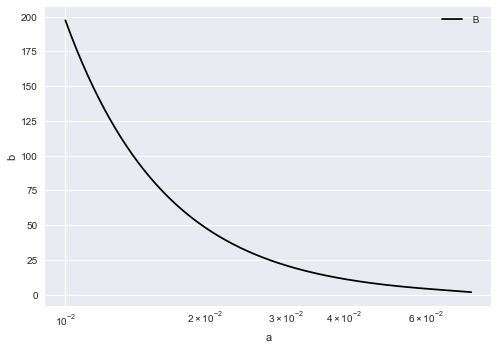

In [27]:
#logspace(a,b,esp) https://www.mathworks.com/help/matlab/ref/logspace.html
# a -> 10^{a}, b-> 10^{b}, esp=espaciado
T=np.logspace(-2,1,1000)
#T=np.linspace(1.5,2,1000)
Y=[Roots(i,L0(i),L01paper(i),L2(i))[0] for i in T]
Y1=[Roots(i,L0(i),L01paper(i),L2(i))[1] for i in T]
plt.figure()
plt.style.use("seaborn")
plt.plot(T,Y,color='black',label=" B ")
#plt.plot(T,Y1,color='red',label=" A ")
plt.semilogx()
#lt.ylim(-1,1)
plt.xlabel("a")
plt.ylabel("b")
plt.legend()
plt.show()

In [15]:
l0=0.9995378798453147
l1=0.19044903770900773
l2=3.2929035646674656
print(-4/l1**2*((l2-2)*(np.pi**2/6)+l2),-4/l1**2)

-597.686216956761 -110.28143944458506


###### PES
> Para el cálculo del PES, se debe tener la densidad espectral de estados $A(\omega)$, la función que describe el espectro de fotoemisión es: <br>

\begin{equation*}
I(\omega,T)=f_T(\omega)\cdot A(\omega,T)
\end{equation*}
#### Caracter FANO
> La curva de resonancia de **Fano** es debido a la interferencia entre dos amplitudes de scattering: una debido al scattering con un continuo de estados **(background process)** y otra debido a la excitación de un estado discreto **(scattering process)**. La energia de este estado resonante debe yacer en el continuo para que el efecto ocurra, cerca a la energia del estado resonante el espectro varia lentamente para el background process, en tanto que para el scattering process el espectro varia de magnitud y fase rápidamente lo que genera un **perfíl asimétrico**. 
> Un espectro tiene caracter **Fano** si es de la forma:
\begin{equation}
I(\omega,T) \propto \sigma_a \cdot \frac{q+\epsilon}{1+\epsilon^2}+\sigma_b
\end{equation}
> Donde $\epsilon=\frac{E-E_r}{\Gamma/2}$

In [16]:
#Para este cálculo se necesitan las librerias:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sea PES y E dos arreglos:
PES=[0,1,2,3,4,5,6,7,8,910]
E=[0,1,2,3,5,6,7,8,9,10,11,12,13]
PES=np.asarray(PES)
E=np.asarray(E)

In [21]:
# Se define un espectro tipo Fano:
    return a*(q+ep)/(1+ep**2)+b
PES=I(E,1,11,11,11,11)
# Se utiliza la función Curve_fit de scipy:
parameters, covariance = curve_fit(I,E,PES)
print(parameters,covariance)

[ 1. 11. 11. 11. 11.] [[ 7.68179880e-28  3.27376512e-28 -8.83586689e-27  4.05844323e-29
  -2.13857440e-28]
 [ 3.27376512e-28  1.48655690e-28 -3.77345198e-27  1.69844652e-30
  -9.23369604e-29]
 [-8.83586689e-27 -3.77345198e-27  1.01640997e-25 -4.54731367e-28
   2.46095418e-27]
 [ 4.05844323e-29  1.69844652e-30 -4.54731367e-28  3.66227172e-29
  -7.52711544e-30]
 [-2.13857440e-28 -9.23369604e-29  2.46095418e-27 -7.52711544e-30
   6.06167820e-29]]


In [22]:
#Despues de ello, es calculado el error estandar para cada parámetro:
SE = np.sqrt(np.diag(covariance))
print(SE)

[2.77160582e-14 1.21924440e-14 3.18811852e-13 6.05167061e-15
 7.78567801e-15]
